MATERI EDA

cara mencari missing value
1. imputasi
2. delet/hapus (hapus kolom/baris)

untuk mengecek outlier menggunakan Q1 dan Q2




In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualisasi
import seaborn as sns #visualisasi

from sklearn.impute import KNNImputer #imputasi
from sklearn.preprocessing import StandardScaler #scaling
from imblearn.over_sampling import SMOTE #oversampling
from wordcloud import WordCloud #viualisasi kata


LOAD DATA

In [4]:
df = pd.read_csv('/content/diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,627.0,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,351.0,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,672.0,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,167.0,21.0,0
4,0.0,NaN,40.0,35.0,168.0,43.1,NaN,33.0,1


In [5]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   653 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             730 non-null    float64
 4   Insulin                   576 non-null    float64
 5   BMI                       538 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,691.0,3.803184,3.333891,0.0,1.0,3.00,6.0,17.0
Glucose,653.0,120.462481,31.941336,0.0,99.0,116.00,140.0,199.0
BloodPressure,614.0,68.959283,19.768892,0.0,62.0,72.00,80.0,114.0
SkinThickness,730.0,20.520548,15.845282,0.0,0.0,23.00,32.0,99.0
Insulin,576.0,76.878472,107.629279,0.0,0.0,36.00,120.5,680.0
BMI,538.0,31.993680,7.945932,0.0,27.1,32.15,36.3,67.1
DiabetesPedigreeFunction,691.0,352.519614,254.783539,0.1,172.0,297.00,535.0,997.0
Age,614.0,33.166124,11.825889,21.0,24.0,29.00,40.0,81.0
Outcome,768.0,0.348958,0.476951,0.0,0.0,0.00,1.0,1.0


In [7]:
df.isnull().sum()

,0
Pregnancies,77
Glucose,115
BloodPressure,154
SkinThickness,38
Insulin,192
BMI,230
DiabetesPedigreeFunction,77
Age,154
Outcome,0


In [8]:
df.isnull().sum()/len(df)*100

,0
Pregnancies,10.026042
Glucose,14.973958
BloodPressure,20.052083
SkinThickness,4.947917
Insulin,25.000000
BMI,29.947917
DiabetesPedigreeFunction,10.026042
Age,20.052083
Outcome,0.000000


In [9]:
# Function to cout outliers using IQR

def cout_outliers_iqr(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

#cout outliers in each numerical column
outlier_counts = {}
for col in df.select_dtypes(include=['int64', 'float64']).columns:
  outlier_counts[col] = cout_outliers_iqr(df[col])

# convert the result into a DataFrame for easier viewing
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier Cout'])

# Display the outlier counts DataFrame
outlier_counts_df

,Column,Outlier Cout
0,Pregnancies,0 False 1 False 2 False 3 ...
1,Glucose,0 False 1 False 2 False 3 ...
2,BloodPressure,0 False 1 False 2 False 3 ...
3,SkinThickness,0 False 1 False 2 False 3 ...
4,Insulin,0 False 1 False 2 False 3 ...
5,BMI,0 False 1 False 2 False 3 ...
6,DiabetesPedigreeFunction,0 False 1 False 2 False 3 ...
7,Age,0 False 1 False 2 False 3 ...
8,Outcome,0 False 1 False 2 False 3 ...


In [10]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


EDA:VISUALISASI

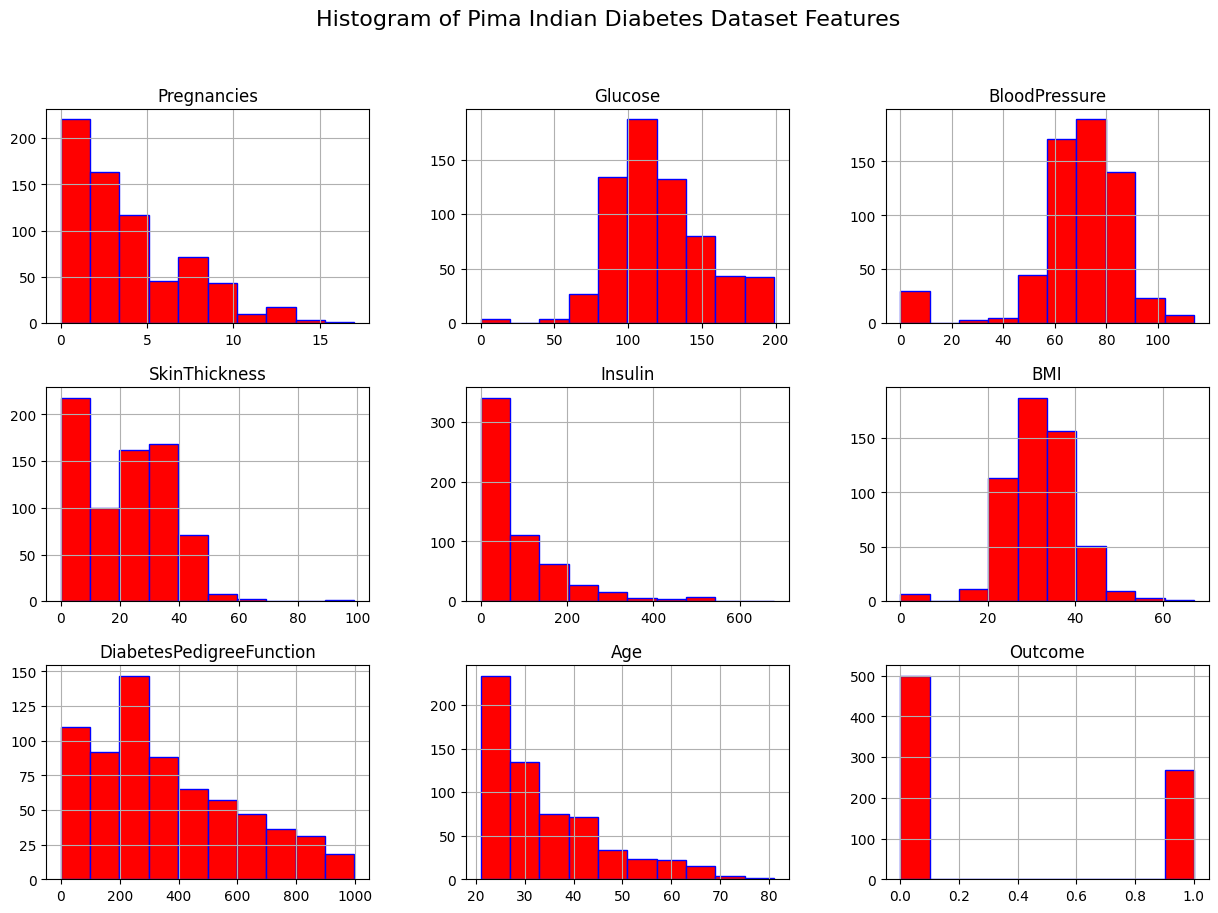

In [11]:
def plt_histograms(data):
  data.hist(bins=10, figsize=(15, 10), layout=(3, 3), color='red', edgecolor='blue')
  plt.suptitle('Histogram of Pima Indian Diabetes Dataset Features', fontsize=16)
  plt.show()

plt_histograms(df)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

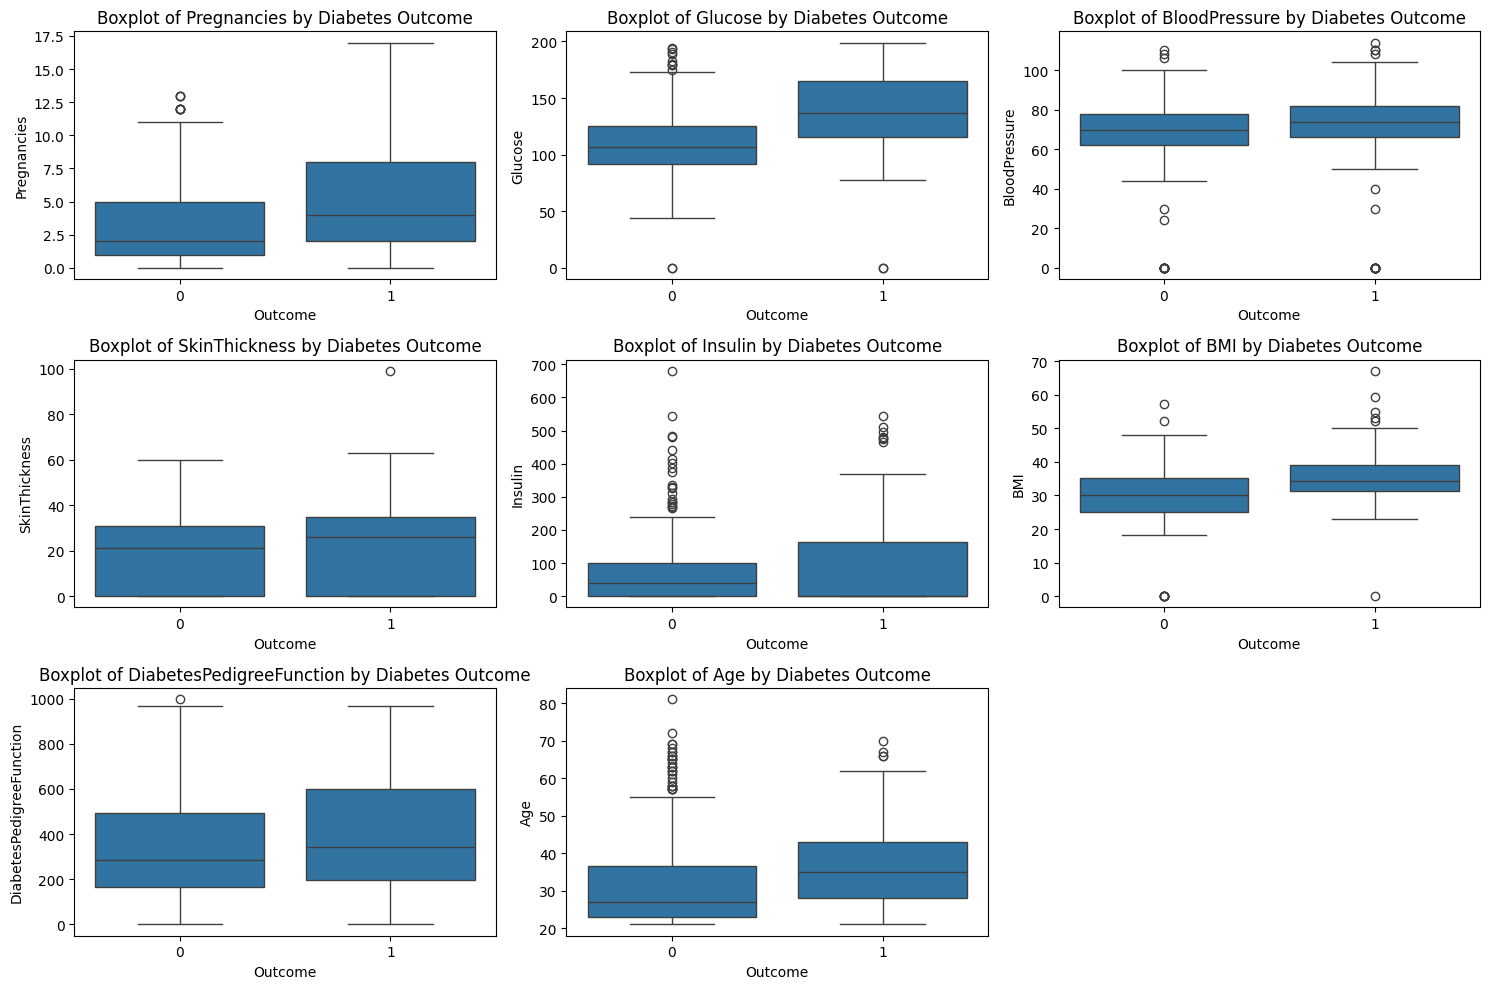

In [ ]:
def plot_boxplots(data):
  plt.figure(figsize=(15, 10))
  for i, column in enumerate(data.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Outcome', y=column, data=data)
    plt.title(f'Boxplot of {column} by Diabetes Outcome')
  plt.tight_layout()
  plt.show()

plot_boxplots(df)

<Axes: >

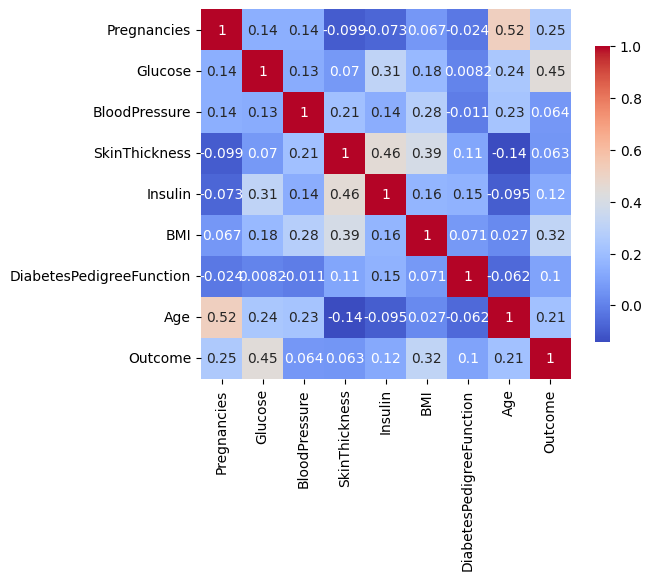

In [12]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

In [13]:
df_text = pd.read_csv('/content/foodreviews - Sheet1.csv')
df_text.head(3)

,ProductID,Helpfulness_Score,Rating,Review_Title,Text
0,CFB001E4K,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,CFB00813G,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,CFB000LQO,1,4,"""Delight"" says it all",This is a confection that has been around a fe...


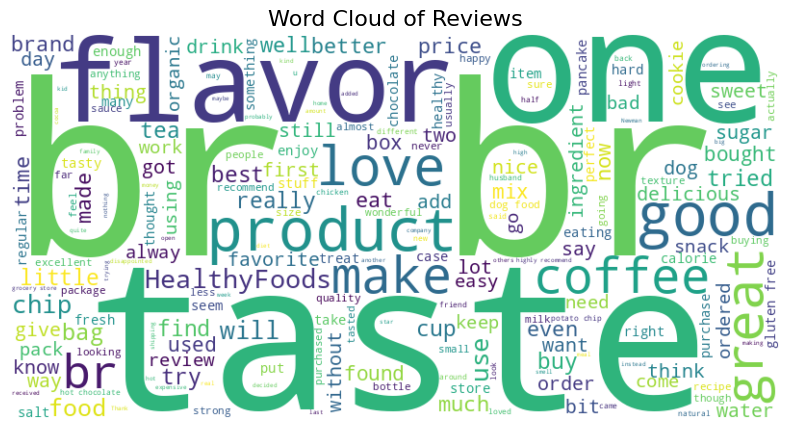

In [14]:
text= " ".join(review for review in df_text.Text)

def plot_wordcloud(text):
  wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title('Word Cloud of Reviews', fontsize=16)
  plt.show()

plot_wordcloud(text)

PREPROCESSING

In [15]:
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [16]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [17]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [18]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

<Axes: xlabel='count', ylabel='Outcome'>

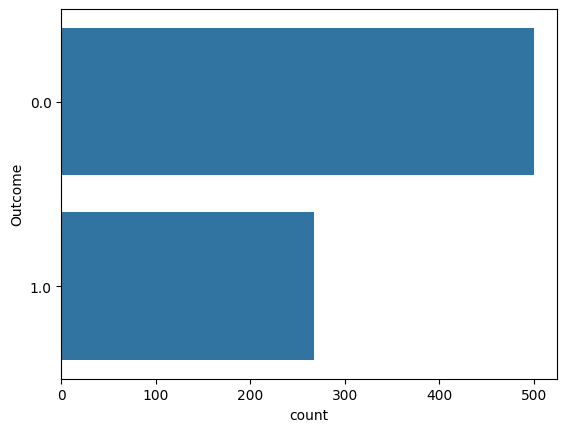

In [ ]:
sns.countplot(data=df, y=y)

<Axes: xlabel='count', ylabel='Outcome'>

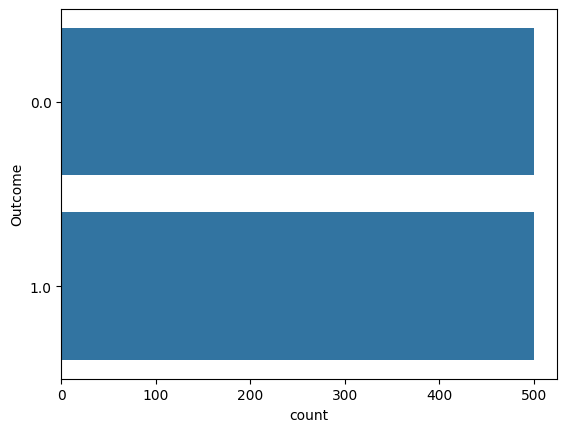

In [20]:
sns.countplot(data=df, y=y_resampled)

In [19]:
scaler = StandardScaler()
df = x_resampled.copy()
df[df.columns.difference(['Outcome'])] = scaler.fit_transform(df[df.columns.difference(['Outcome'])])